# Capstone Project 1 - Dataset: San Francisco Police Department Incident data from Jan 1st 2015

Column Name	Column Type	Description

IncidntNum	Int64	incident number

Category	Object/string	incident category

Descript	Object/string	Incident description

DayOfWeek	Object/string	Incident day of the week

Date	    Object/date	    Incident date

Time	    Object/string	Incident time

PdDistrict	Object/string	Incident PD district

Resolution	Object/string	Incident resolution

Address	    Object/string	Incident address

X	        Float64	        Incident  Latitude

Y	        Float64	        Incident Longitude

Location	object	        Incident location


PdId	    Int64	        PD identification number


# Project Basic Objectives set on April 15th 2017
1.	What are the top 3 locations for the incidents 
2.	What are the top 3 districts  for the incidents 
3.	What are the unique category types
4.	Can we define sub categories from the descript column
5.	Split the date into year, month - to plot the above with every over year, month over moth comparison
6.	Plot incident category type on day of the week and summarize the findings, do the same for month and year
7.	Create the heat map day of the week vs hours/month/year for each month/year



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# load the data and covert the Date string into datetime format and data is from Jan 01 2015
# load time was about 5 minutes
df = pd.read_csv('SFPD_IncidentsFrom20150101.csv',parse_dates=['Date'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345295 entries, 0 to 345294
Data columns (total 13 columns):
IncidntNum    345295 non-null int64
Category      345295 non-null object
Descript      345295 non-null object
DayOfWeek     345295 non-null object
Date          345295 non-null datetime64[ns]
Time          345295 non-null object
PdDistrict    345294 non-null object
Resolution    345295 non-null object
Address       345295 non-null object
X             345295 non-null float64
Y             345295 non-null float64
Location      345295 non-null object
PdId          345295 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 34.2+ MB


In [4]:
# create Year, Month column using Date column to plot the graph using Year and Month
df['Year'] = df['Date'].apply(lambda dt: dt.year) # lambda function retunrns Year integer for each row
df['Month'] = df['Date'].apply(lambda dt: dt.strftime('%B')) # Lambda fuction returns the Month string for each row

In [5]:
# create Hour column suing Time column to bucket the incidents into 24 different slots for each day
df['Hour'] = df['Time'].apply(lambda tm: int(tm.split(':')[0]))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345295 entries, 0 to 345294
Data columns (total 16 columns):
IncidntNum    345295 non-null int64
Category      345295 non-null object
Descript      345295 non-null object
DayOfWeek     345295 non-null object
Date          345295 non-null datetime64[ns]
Time          345295 non-null object
PdDistrict    345294 non-null object
Resolution    345295 non-null object
Address       345295 non-null object
X             345295 non-null float64
Y             345295 non-null float64
Location      345295 non-null object
PdId          345295 non-null int64
Year          345295 non-null int64
Month         345295 non-null object
Hour          345295 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(9)
memory usage: 42.2+ MB


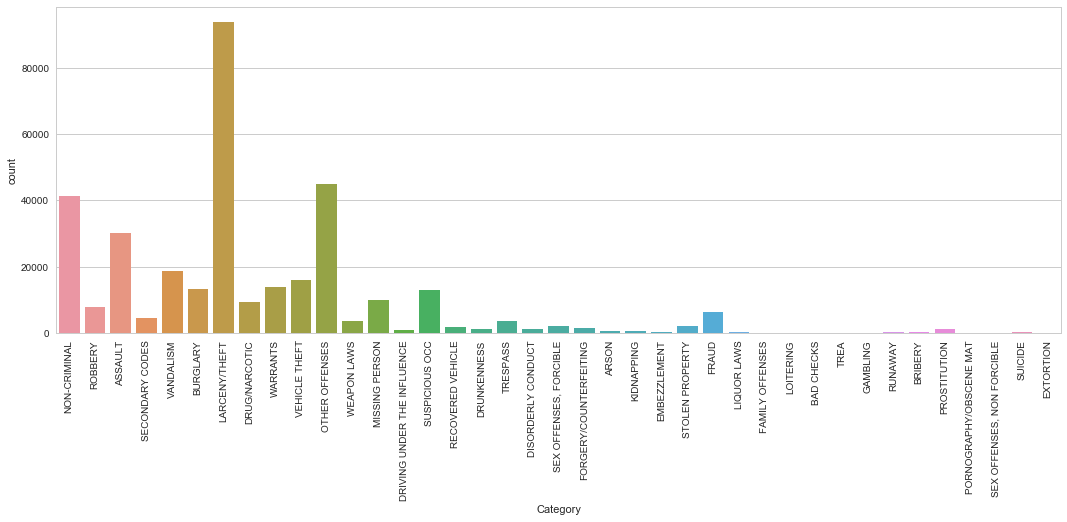

In [7]:
#Simple count graph on category to check on the highest incidents 
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
sns.countplot(x='Category',data=df)

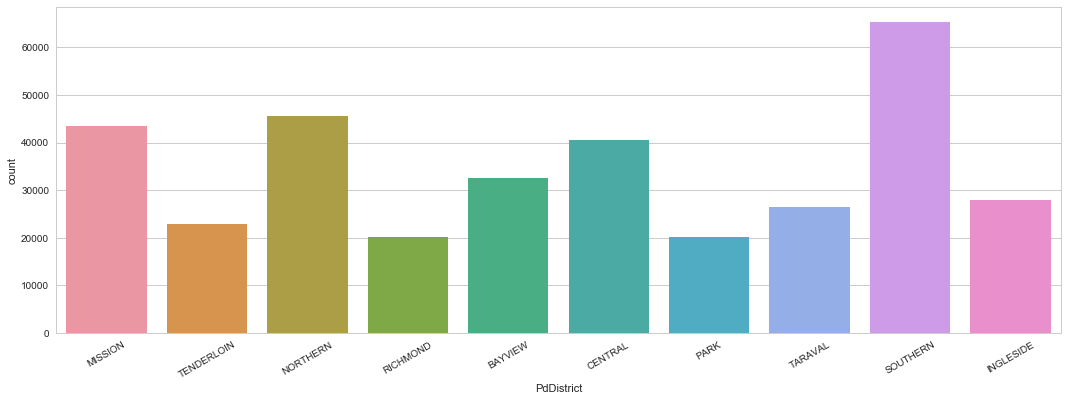

In [8]:
#Simple count graph on Police Department D District to check on the highest incidents 
plt.figure(figsize=(18,6))
plt.xticks(rotation=30)
sns.countplot(x='PdDistrict',data=df)

In [9]:
# Build the dataframe with day of the week and hours
dayHour = df.groupby(by=['DayOfWeek','Hour']).count()['Category'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayOfWeek,,,,,,,,,,,,,,,,,,,,,
Friday,2443,1430,1084,719,580,569,826,1389,1890,2017,...,2454,2866,2965,3283,3518,3218,3027,2894,2774,2895
Monday,2199,1145,1045,753,607,598,897,1275,1906,2020,...,2431,2645,2761,3061,3415,2884,2739,2292,2155,1785
Saturday,2703,1948,1557,1066,690,610,670,999,1426,1752,...,2407,2584,2671,2848,3135,2888,2771,2688,2797,2955
Sunday,2825,2110,1702,1093,672,530,653,918,1297,1514,...,2269,2697,2645,2886,2692,2655,2393,2228,2214,1845
Thursday,2217,1156,952,755,630,523,768,1324,1920,2015,...,2519,2556,2800,3143,3396,3178,2674,2429,2391,2059


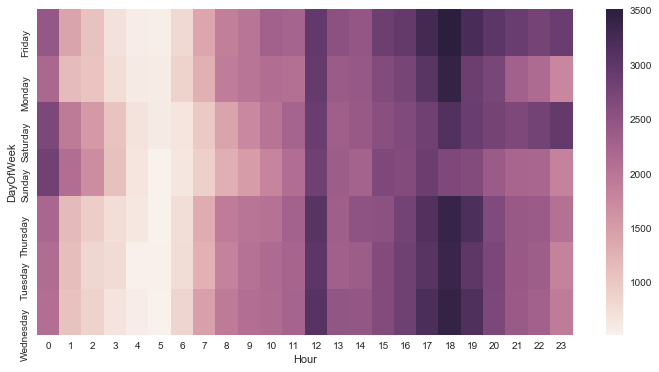

In [10]:
#plot the heat map
plt.figure(figsize=(12,6))
plt.yticks(rotation=180)
sns.heatmap(dayHour)
#most of the incidents happens on 12th, 17th,19th hours(evening) and very less incidents from 2am to 6am

In [11]:
# Build the dataframe with day of the week and Month
dayMonth = df.groupby(by=['DayOfWeek','Month']).count()['Category'].unstack()
dayMonth.head()

Month,April,August,December,February,January,July,June,March,May,November,October,September
DayOfWeek,,,,,,,,,,,,
Friday,4079,3698,3561,5342,6453,4384,3561,5949,4202,3577,4049,4071
Monday,3678,4162,3014,5557,5261,3234,3672,5386,3718,3499,3821,3132
Saturday,4243,3933,3445,5284,6145,3791,3505,5078,3916,3327,4457,3546
Sunday,3476,3617,2815,4912,5389,3557,3425,5191,4124,3630,3567,3244
Thursday,3778,3369,4117,4989,5606,3580,3643,5729,3465,3146,3907,3811


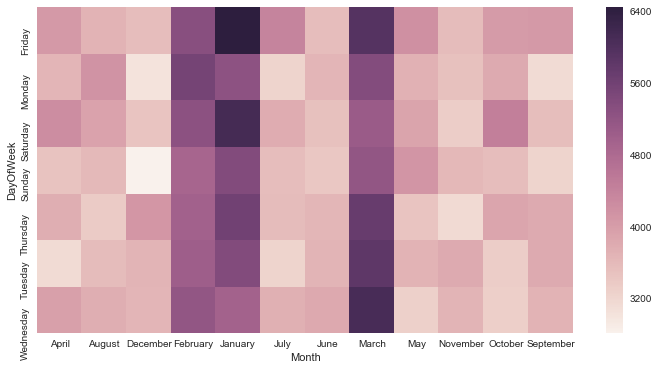

In [12]:
#plot the heat map
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth)
# Jan, Feb & March had high number of incidents

In [13]:
# Build the dataframe with day of the week and Year
dayYear = df.groupby(by=['DayOfWeek','Year']).count()['Category'].unstack()
dayYear.head()

Year,2015,2016,2017
DayOfWeek,,,
Friday,23838,23310,5778
Monday,21766,20728,5640
Saturday,22902,22131,5637
Sunday,21309,20158,5480
Thursday,22459,21329,5352


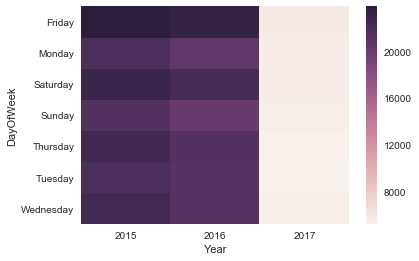

In [14]:
#build the headmap
sns.heatmap(dayYear)